# Sensitivity Analysis

This notebook contains a simple sensitivity analy

In [1]:
%env ARTS_INCLUDE_PATH=/home/simonpf/src/arts/controlfiles/
%env ARTS_DATA_PATH=/home/simonpf/src/arts_xml/
%env ARTS_BUILD_PATH=/home/simonpf/build/arts/

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from typhon.arts.workspace import Workspace
import atms


env: ARTS_INCLUDE_PATH=/home/simonpf/src/arts/controlfiles/
env: ARTS_DATA_PATH=/home/simonpf/src/arts_xml/
env: ARTS_BUILD_PATH=/home/simonpf/build/arts/
ARTS BUILD PATH: /home/simonpf/build/arts/
Loading ARTS API from: /home/simonpf/build/arts/src/libarts_api.so


## ARTS Setup

In [7]:
ws = Workspace()
z = np.linspace(0, 15, 201) * 1e3
channels = [0,15,16,17,19]
atms.setup_atmosphere(ws, z)
atms.setup_sensor(ws, channels)
atms.setup_jacobian(ws)
atms.checks(ws)

ARTS[396611664]: Executing /home/simonpf/src/arts/controlfiles/general/general.arts
ARTS[396611664]: {
ARTS[396611664]: - verbosityInit
ARTS[396611664]: - scat_speciesSet
ARTS[396611664]: - MatrixSet
ARTS[396611664]: - Tensor4SetConstant
ARTS[396611664]: - ArrayOfStringSet
ARTS[396611664]: - Touch
ARTS[396611664]: - FlagOff
ARTS[396611664]: - MatrixSet
ARTS[396611664]: - NumericSet
ARTS[396611664]: - ArrayOfStringSet
ARTS[396611664]: - Tensor3SetConstant
ARTS[396611664]: - Tensor3SetConstant
ARTS[396611664]: - Tensor3SetConstant
ARTS[396611664]: - Tensor3SetConstant
ARTS[396611664]: - Tensor3SetConstant
ARTS[396611664]: - Tensor3SetConstant
ARTS[396611664]: - IndexSet
ARTS[396611664]: - IndexSet
ARTS[396611664]: - IndexSet
ARTS[396611664]: - IndexSet
ARTS[396611664]: - FlagOff
ARTS[396611664]: - output_file_formatSetAscii
ARTS[396611664]: - StringSet
ARTS[396611664]: - IndexSet
ARTS[396611664]: - abs_lineshapeDefine
ARTS[396611664]: - NumericSet
ARTS[396611664]: - NumericSet
ARTS[39661

# Jacobian Calculation

Having set up the atmosphere the jacobian for the current atmospheric state can be computed by simply calling
`yCalc`.

In [9]:
ws.yCalc()

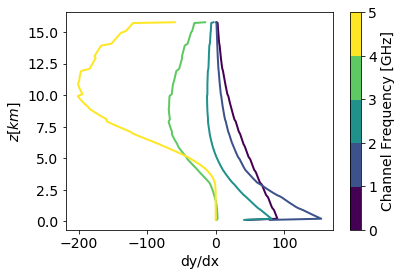

In [11]:
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
import matplotlib

matplotlib.rcParams.update({'font.size': 14})
n_channels = len(channels)

# Generate color for rows in jacobian.
norm = Normalize(vmin=0, vmax=n_channels)
cm   = ScalarMappable(norm=norm, cmap=matplotlib.cm.get_cmap("viridis", n_channels))
cm.set_array(np.arange(0,n_channels)) 
cs   = cm.to_rgba(np.arange(0,n_channels))

# Plot rows of jacobian.
for i in range(len(channels)):
    plt.plot(ws.jacobian.value[i,:], ws.z_field.value.ravel() * 1e-3, c=cs[i], lw=2)
    
cb = plt.colorbar(cm)
cb.set_label("Channel Frequency [GHz]")
plt.xlabel(r"dy/dx")
plt.ylabel(r"$z [km]$")

To illustrate the sensitivity of the different ATMS channels for water vapor at different altitudes, we plot the rows of the jacobian against the height of the grid points corresponding to the columns of the jacobian. As can be seen from the plot, the lower frequencies are sensitive to water vapor at low altitudes, whereas higher frequency are sensitive at higher altitudes.

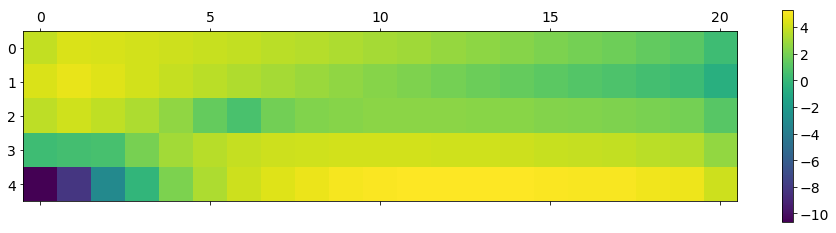

In [12]:
plt.matshow(np.log(np.abs(ws.jacobian.value[:,::10])))
plt.colorbar()

Based on the above observation we choose channels  0, 15, 16, 17, 18, 19, 20, 21
for the training set. This should guarantee sensitivity over the whole altitude range used in the simulations (0 km - 15 km).